In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data/flights_sample_3m.csv')

In [5]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [6]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [7]:
df1 = df[['FL_DATE', 'AIRLINE', 'ORIGIN','DEST','CRS_DEP_TIME', 'DEP_DELAY','CANCELLED','DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS','DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT']].copy()

# Replace negative DEP_DELAY values with 0
df1['DEP_DELAY'] = df1['DEP_DELAY'].apply(lambda x: 0 if x < 0 else x)

res = ['DELAY_DUE_CARRIER','DELAY_DUE_WEATHER', 'DELAY_DUE_NAS','DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT']

for col in res:
    df1[col] = df1[col].apply(lambda x: 0 if x > 0 else x==0).astype(int)

df1[['DELAY_DUE_CARRIER','DELAY_DUE_WEATHER', 'DELAY_DUE_NAS','DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT']]


df1 = df1[df1['CANCELLED'] == 0].copy()
df1.dropna(inplace=True)


In [8]:
df1

,FL_DATE,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CANCELLED,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,FLL,EWR,1155,0.0,0.0,1065.0,0,0,0,0,0
1,2022-11-19,Delta Air Lines Inc.,MSP,SEA,2120,0.0,0.0,1399.0,0,0,0,0,0
2,2022-07-22,United Air Lines Inc.,DEN,MSP,954,6.0,0.0,680.0,0,0,0,0,0
3,2023-03-06,Delta Air Lines Inc.,MSP,SFO,1609,0.0,0.0,1589.0,1,1,0,1,1
4,2020-02-23,Spirit Air Lines,MCO,DFW,1840,0.0,0.0,985.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,JAX,CLT,1742,0.0,0.0,328.0,0,0,0,0,0
2999996,2022-11-02,American Airlines Inc.,ORD,AUS,1300,0.0,0.0,977.0,0,0,0,0,0
2999997,2022-09-11,Delta Air Lines Inc.,HSV,ATL,534,41.0,0.0,151.0,1,0,1,1,1
2999998,2019-11-13,Republic Airline,BOS,LGA,1600,0.0,0.0,184.0,0,0,0,0,0


In [9]:
df1.groupby('AIRLINE')['DEP_DELAY'].mean().sort_values(ascending=False)

AIRLINE
JetBlue Airways                       22.256309
Frontier Airlines Inc.                20.118742
Allegiant Air                         18.736789
ExpressJet Airlines LLC d/b/a aha!    17.716204
Spirit Air Lines                      16.026478
Mesa Airlines Inc.                    15.962148
American Airlines Inc.                15.735878
United Air Lines Inc.                 14.523830
SkyWest Airlines Inc.                 13.447883
Southwest Airlines Co.                12.576835
PSA Airlines Inc.                     12.453113
Delta Air Lines Inc.                  10.974932
Envoy Air                             10.471192
Republic Airline                      10.355291
Endeavor Air Inc.                      9.951903
Alaska Airlines Inc.                   9.456345
Hawaiian Airlines Inc.                 8.244626
Horizon Air                            7.993435
Name: DEP_DELAY, dtype: float64

In [10]:
df1['FL_DATE'] = pd.to_datetime(df1['FL_DATE'])
df1['MONTH'] = df1['FL_DATE'].dt.month
df1['DAY_OF_WEEK'] = df1['FL_DATE'].dt.dayofweek  # Monday=0, Sunday=6

In [11]:
df1['DEP_HOUR'] = df1['CRS_DEP_TIME'] // 100  # 1155 -> 11

In [12]:
df_encoded = pd.get_dummies(df1[['AIRLINE', 'ORIGIN', 'DEST']], drop_first=True)

In [13]:
X = pd.concat([df_encoded, df1[['MONTH', 'DAY_OF_WEEK', 'DEP_HOUR','DISTANCE', 'DELAY_DUE_CARRIER','DELAY_DUE_WEATHER', 'DELAY_DUE_NAS']]], axis=1)
df1['DELAY_SEVERE'] = (df1['DEP_DELAY'] > 15).astype(int)
y = df1['DELAY_SEVERE']

In [14]:
df1['DELAY_SEVERE'].value_counts()

DELAY_SEVERE
0    2407850
1     513010
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [16]:
from xgboost import XGBClassifier
scale = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
model = XGBClassifier(
                    max_depth=6,
                    learning_rate=0.05,
                    random_state=42,
                    use_label_encoder=False,
                    n_estimators=300,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    eval_metric='logloss',
                    scale_pos_weight=scale
)
model.fit(X_train, y_train)

c:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:44:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix 
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96    481638
           1       0.78      0.81      0.80    102534

    accuracy                           0.93    584172
   macro avg       0.87      0.88      0.88    584172
weighted avg       0.93      0.93      0.93    584172

[[458776  22862]
 [ 19758  82776]]


In [40]:
df1.loc[(df1['ORIGIN'] == 'LAX') & (df1['DEST'] == 'JFK'), 'DISTANCE'].unique()

array([2475.])

In [39]:
new_input = pd.DataFrame([{
    'DEP_HOUR': 8,
    'DAY_OF_WEEK': 1,
    'DISTANCE':2475,
    'MONTH': 8,
    'AIRLINE_DL': 1,
    'ORIGIN_LAX': 1,
    'DEST_JFK': 1,
}], columns=X.columns)  

prediction = model.predict_proba(new_input)[0][1]  # probability of delay
print(f"Chance of delay: {prediction:.2%}")

Chance of delay: 33.82%


In [22]:
model_columns = X.columns.tolist()

# Save both model and column list
import joblib
joblib.dump(model, 'flight_delay_model.pkl')
joblib.dump(model_columns, 'model_columns.pkl')


['model_columns.pkl']

In [44]:
import pickle

# Build airport_distances dictionary
airport_distances = (
    df1[['ORIGIN', 'DEST', 'DISTANCE']]
    .drop_duplicates()
    .set_index(['ORIGIN', 'DEST'])['DISTANCE']
    .to_dict()
)

# Save as pickle
with open('airport_distances.pkl', 'wb') as f:
    pickle.dump(airport_distances, f)

print("airport_distances.pkl created successfully!")

airport_distances.pkl created successfully!


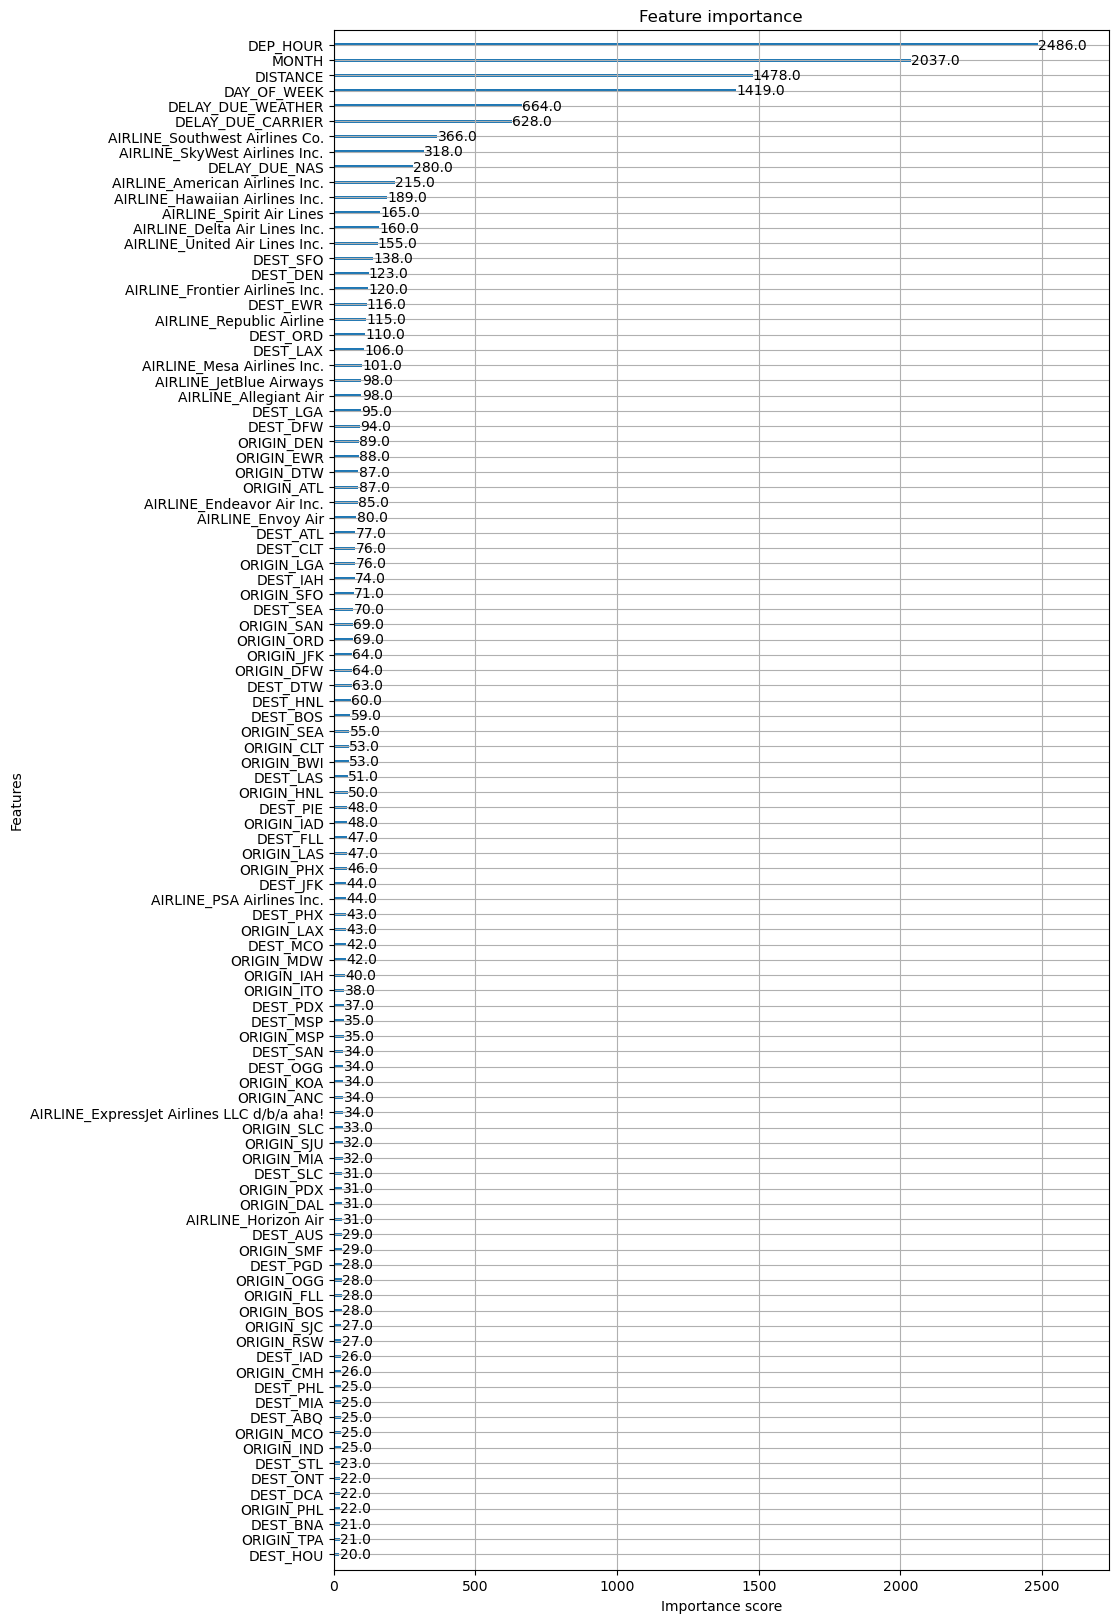

In [37]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 20))  # Wider and taller plot
plot_importance(model, max_num_features=100, ax=ax)
plt.show()


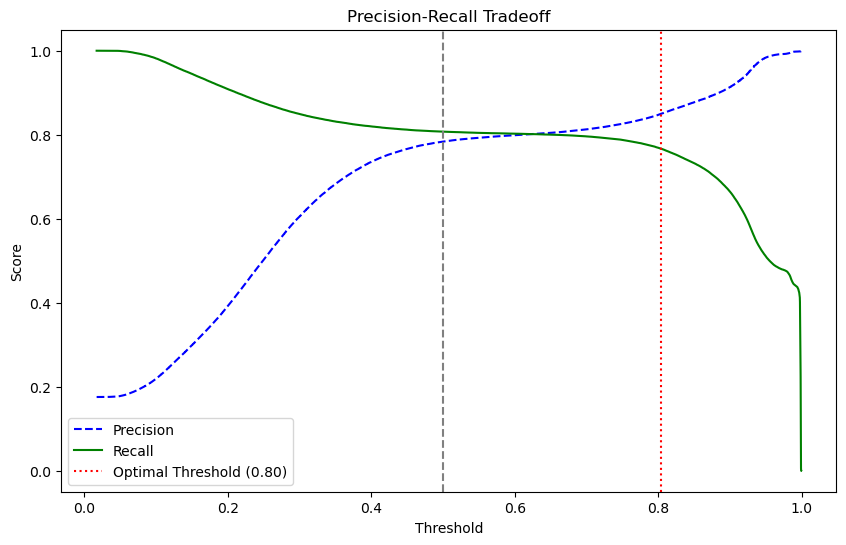

Optimal threshold: 0.80


In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class (delays)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Tradeoff')
plt.legend(loc='lower left')

# Add a vertical line at the default 0.5 threshold
plt.axvline(x=0.5, color='gray', linestyle='--')

# Find optimal threshold (where precision and recall intersect)
optimal_idx = np.argmax(precision[:-1] + recall[:-1])
optimal_threshold = thresholds[optimal_idx]
plt.axvline(x=optimal_threshold, color='red', linestyle=':', 
            label=f'Optimal Threshold ({optimal_threshold:.2f})')

plt.legend()
plt.show()

# Print the optimal threshold value
print(f"Optimal threshold: {optimal_threshold:.2f}")

# Apply the optimal threshold to get new predictions
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)